In [11]:
# installations 
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install rsatoolbox

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.io 
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform
import json
from PIL import Image
import mne
import rsatoolbox as rsa
import rsatoolbox.data as rsa_data
import rsatoolbox.rdm as rdm
import rsatoolbox.vis as vis
import rsatoolbox.io as io
from rsatoolbox.io import meadows
from rsatoolbox.vis import rdm_plot
from rsatoolbox.rdm import rdms

In [3]:
#matplotlib.use('Qt5Agg') # use Qt5Agg backend = best choice for MNE-Python's interactive plotting functions

In [4]:
help(rsa)

Help on package rsatoolbox:

NAME
    rsatoolbox - Top level package: Only imports and organisation

PACKAGE CONTENTS
    data (package)
    inference (package)
    io (package)
    model (package)
    rdm (package)
    simulation (package)
    util (package)
    vis (package)

FILE
    c:\users\tks086\anaconda3\envs\mne\lib\site-packages\rsatoolbox\__init__.py




In [5]:
# subject 1 - sessions 1 to 10 

In [6]:
filepath = r"C:\Users\TKS086\data\participants.tsv"
df_particpants = pd.read_csv(filepath, sep="\t") 
a = df_particpants.values
df_particpants

,participant_id,head_circumference
0,pilot0,NaN
1,pilot1,NaN
2,pilot2,NaN
3,pilot3,59.0
4,01,NaN
5,02,NaN
6,03,NaN
7,04,NaN
8,05,NaN


In [7]:
data = pd.read_json('/Users/TKS086/data/dataset_description.json', lines=True, chunksize = 100)
data

In [8]:
# specify file location 
filepath = r"C:\Users\TKS086\data\sub-01_ses-05_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values
df

,filename,acq_time
0,eeg/sub-01_ses-05_task-nback_run-01_eeg.bdf,2019-09-12T16:44:23


In [9]:
filepath = r"C:\Users\TKS086\data\sub-01_ses-06_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values

In [10]:
filepath = r"C:\Users\TKS086\data\sub-01_ses-07_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values

In [11]:
filepath = r"C:\Users\TKS086\data\sub-01_ses-08_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values

In [12]:
filepath = r"C:\Users\TKS086\data\sub-01_ses-09_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values

In [13]:
filepath = r"C:\Users\TKS086\data\sub-01_ses-10_scans.tsv"
df = pd.read_csv(filepath, sep="\t") 
a = df.values

In [14]:
filepath = r"C:\Users\TKS086\data\nback.tsv"
df_nback = pd.read_csv(filepath, sep="\t") 
a = df_nback.values
df_nback = df_nback.drop(['run', 'session', 'datetime'], axis=1) # drop coloumns 
df_nback = df_nback.rename({'subject' : 'participant_id'}, axis = 1)
df_nback = pd.merge(df_nback, df_particpants)  # merge with participant info
df_nback

,participant_id,n_targets,hits,false_alarms,rt,keys,head_circumference
0,01,10,10,3,2.205460,num_add=13,NaN
1,01,10,9,2,2.060333,num_add=11,NaN
2,01,10,9,0,1.686978,num_add=9,NaN
3,01,10,6,2,1.767783,num_add=8,NaN
4,01,10,8,0,1.634375,"num_add=8, f6=1",NaN
...,...,...,...,...,...,...,...
262,pilot3,10,9,0,2.537833,num_add=9,59.0
263,pilot3,10,9,0,1.205478,num_add=9,59.0
264,pilot3,10,8,0,1.451775,num_add=8,59.0
265,pilot3,10,10,0,1.824880,num_add=10,59.0


In [15]:
sub1df = df_nback.loc[df_nback['participant_id'] == '01'] #subject 1

In [16]:
filepath = r"C:\Users\TKS086\data\Meadows_avima-audio-version1_v_v2_secure-kit_2_events.log.tsv"
sub1 = pd.read_csv(filepath, sep="\t") 
a = sub1.values
sub1 = sub1.drop(['logStarted'], axis = 1)
sub1

,1567513886687,{}
0,1567513886687,"{'w': 1920, 'h': 1080}"
1,1567513886688,"{'w': 1853, 'h': 885.328125}"
2,1567514029353,"{'w': 1920, 'h': 974.6875}"
3,1567514047302,"{'y': -0.3799515981009865, 'cat': '', 'x': 0.0..."
4,1567514050405,"{'y': -0.8383082333968689, 'cat': '', 'x': -0...."
...,...,...
1435,1567516607547,"{'y': -0.510325622694293, 'cat': '', 'x': -0.1..."
1436,1567516609114,"{'y': 0.18160455157696875, 'cat': '', 'x': 0.5..."
1437,1567516611033,"{'y': -0.004344210018284718, 'cat': '', 'x': 0..."
1438,1567516612569,"{'y': 0.413425042076587, 'cat': '', 'x': 0.123..."


In [17]:
sub2df = df_nback.loc[df_nback['participant_id'] == '02'] # subject 2 

In [18]:
sub3df = df_nback.loc[df_nback['participant_id'] == '03'] # subject 3

In [19]:
sub4df = df_nback.loc[df_nback['participant_id'] == '04'] # subject 4

In [20]:
sub5df = df_nback.loc[df_nback['participant_id'] == '05'] # subject 5

In [21]:
pil0df = df_nback.loc[df_nback['participant_id'] == 'pilot0'] # pilot study 0

In [22]:
pil1df = df_nback.loc[df_nback['participant_id'] == 'pilot1'] # pilot study 1

In [23]:
pil2df = df_nback.loc[df_nback['participant_id'] == 'pilot2'] # pilot study 2

In [24]:
pil3df = df_nback.loc[df_nback['participant_id'] == 'pilot3'] # pilot study 3

In [3]:
# load matlab files 
filepath = r"C:\Users\TKS086\Data\Meadows_avima-audio-version1_v_v2_secure-kit_2_1D.mat"
securekit = scipy.io.loadmat(filepath)
print(securekit) # we can see rdmutv

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Sep  3 13:21:38 2019', '__version__': '1.0', '__globals__': [], 'rdmutv': array([[0.01081554, 0.03845189, 0.02836939, ..., 0.02465802, 0.01693079,
        0.03578001]]), 'stimuli': array(['baby_laughing                   ',
       'baby_singing                    ',
       'beach                           ',
       'bird_singing                    ',
       'boxing                          ',
       'boiling_water_with_kettle       ',
       'bubble_wrap_popping             ',
       'cat_meowing                     ',
       'chainsaw_cutting                ',
       'child_crying                    ',
       'cow_moo                         ',
       'donkey_braying                  ',
       'dolphin_call                    ',
       'drinking_sounds                 ',
       'dot_matrix_printer              ',
       'eating_sounds                   ',
       'drum_roll                       ',
       'fireplace 

In [6]:
rdmutv = securekit["rdmutv"]
#rdmutv is the upper triangle so create matrix

euc_dist = rdmutv.T + rdmutv - np.diag(np.diag(rdmutv))
np.fill_diagonal(euc_dist,0, wrap=False)

In [8]:
stimuli = securekit["stimuli"]
stim = pd.Series(stimuli)

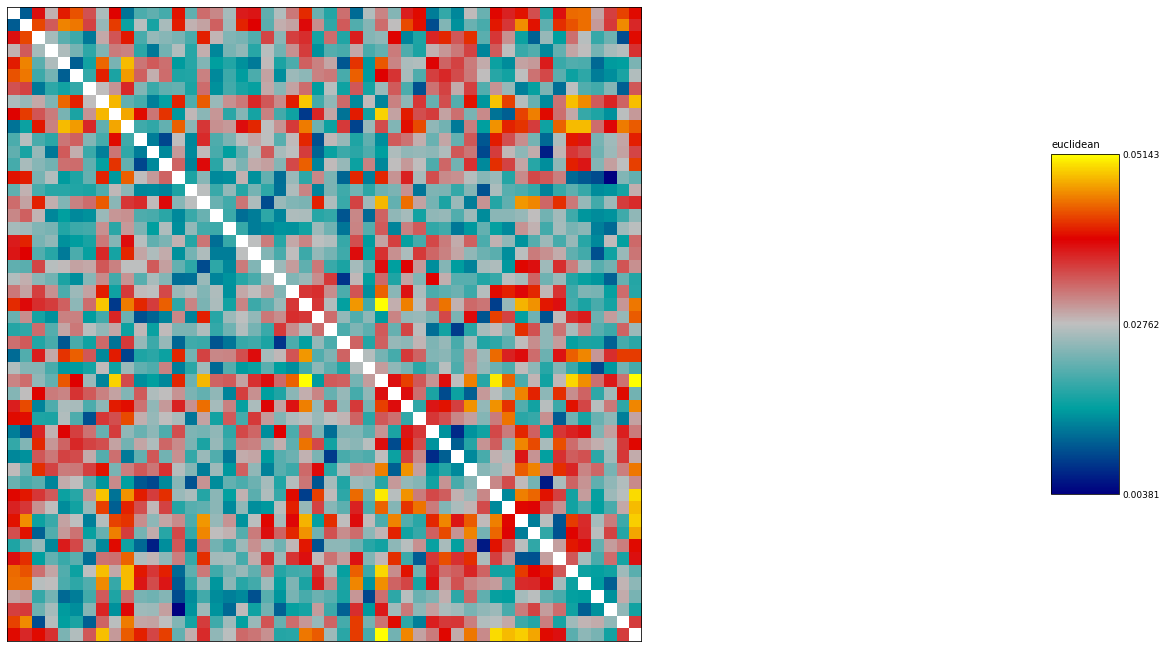

In [18]:
rdms = rsa.io.meadows.load_rdms(filepath)
#print(rdms)
fig,_,_ = rsa.vis.show_rdm(rdms, figsize=(25,25), show_colorbar="figure")